### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [14]:
len(lista_alumnos)

21

1. Crea un dataframe

In [2]:
import pandas as pd

df = pd.DataFrame(lista_alumnos, columns=["Nombre","Edad","Altura"])
df.head()

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [4]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


2. Realiza un breve análisis exploratorio de los datos

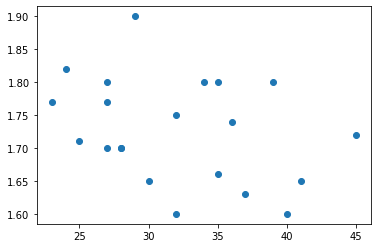

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['Edad'], df['Altura']);

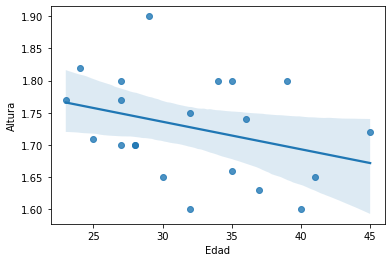

In [9]:
import seaborn as sns

sns.regplot(data=df, x="Edad", y ="Altura");

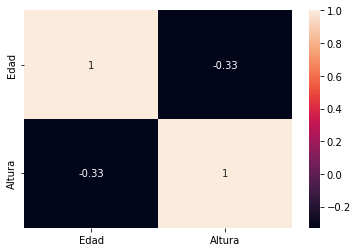

In [10]:
sns.heatmap(df.corr(), annot=True);

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


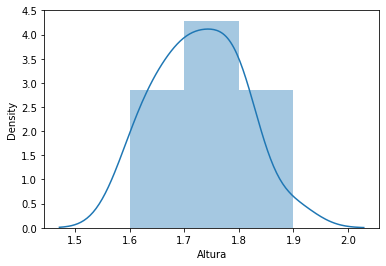

In [11]:
sns.distplot(df['Altura']);

3. Divide el dataset para el entrenamiento

In [12]:
X = df[['Edad']]
y = df['Altura']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [47]:
print("Total features shape", X.shape)
print("Train features shape", X_train.shape)
print("Test features shape", X_test.shape)

Total features shape (21, 1)
Train features shape (15, 1)
Test features shape (6, 5)


In [48]:
print("Total target shape", y.shape)
print("Train target shape", y_train.shape)
print("Test target shape", y_test.shape)

Total target shape (21,)
Train target shape (15,)
Test target shape (6,)


4. Entrena tu modelo

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print(model.intercept_, model.coef_)

1.8695222482435596 [-0.00404567]


y(Altura) = 1.87 - 0.004 * x1(Edad)

x = 0; y = 1.87
x = 1; y = 1.866
x = 2; y = 1.862
x = 40; y = 1.71

5. Obtén predicciones con el test

In [23]:
predictions = model.predict(X_test)
predictions

array([1.7764719 , 1.76028923, 1.72792389, 1.74815222, 1.74006089,
       1.76028923])

6. Evalúa tu modelo

In [29]:
df_eval = pd.DataFrame(X_test)
df_eval['predictions'] = predictions
df_eval['real_value'] = y_test
df_eval['error'] = abs(df_eval['predictions'] - df_eval['real_value'])
df_eval

,Edad,predictions,real_value,error
14,23,1.776472,1.77,0.006472
5,27,1.760289,1.80,0.039711
2,35,1.727924,1.66,0.067924
11,30,1.748152,1.65,0.098152
7,32,1.740061,1.60,0.140061
18,27,1.760289,1.77,0.009711


In [30]:
# MAE (Mean Absolute Error)
import numpy as np
np.sum(df_eval['error'])/len(df_eval)

0.06033840749414521

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions, y_test)

0.06033840749414521

In [37]:
# MSE (Mean Squarred Error)
df_eval['error_cuad'] = df_eval['error'] ** 2
np.sum(df_eval['error_cuad'])/len(df_eval)

0.00592961611153464

In [38]:
mean_squared_error(predictions, y_test)

0.00592961611153464

In [39]:
# RMSE (Root Mean Squarred Error)
np.sqrt(np.sum(df_eval['error_cuad'])/len(df_eval))

0.07700400062032257

In [42]:
np.sqrt(mean_squared_error(predictions, y_test))

0.07700400062032257

7. Representa tus predicciones en una gráfica.

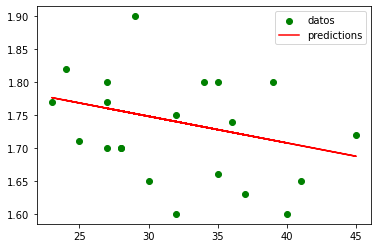

In [46]:
plt.scatter(df['Edad'], df['Altura'], color="g", label="datos")
plt.plot(df['Edad'], model.predict(X), color="r", label="predictions")
plt.legend()

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


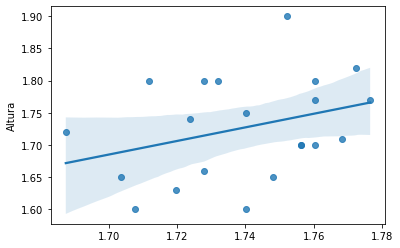

In [57]:
sns.regplot(model.predict(X), y);

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


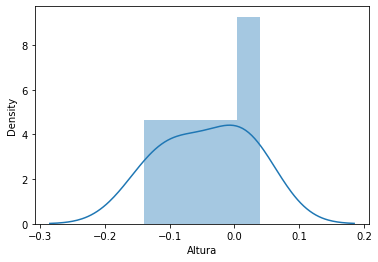

In [60]:
sns.distplot((y_test - predictions), bins=5);